___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# !pip install matplotlib==3.4

In [2]:
# !pip install gensim
# !pip install wordcloud
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import warnings
warnings.filterwarnings("ignore")

from gensim.models import Word2Vec

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import re
import nltk
import os

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.utils import class_weight

from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score, PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, roc_auc_score, average_precision_score
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

from yellowbrick.classifier import PrecisionRecallCurve

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Recall
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Model

from transformers import AutoTokenizer, TFAutoModel

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 50)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

In [5]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [6]:
strategy = tf.distribute.TPUStrategy(resolver)

In [7]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [8]:
df = pd.read_csv("/content/drive/MyDrive/Notebooks/NLP/Womens Clothing E-Commerce Reviews.csv", index_col = 0)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [9]:
df2 = df.copy()

In [10]:
df["Review Text"].head(20)

0     Absolutely wonderful - silky and sexy and comf...
1     Love this dress!  it's sooo pretty.  i happene...
2     I had such high hopes for this dress and reall...
3     I love, love, love this jumpsuit. it's fun, fl...
4     This shirt is very flattering to all due to th...
5     I love tracy reese dresses, but this one is no...
6     I aded this in my basket at hte last mintue to...
7     I ordered this in carbon for store pick up, an...
8     I love this dress. i usually get an xs but it ...
9     I'm 5"5' and 125 lbs. i ordered the s petite t...
10    Dress runs small esp where the zipper area run...
11    This dress is perfection! so pretty and flatte...
12    More and more i find myself reliant on the rev...
13    Bought the black xs to go under the larkspur m...
14    This is a nice choice for holiday gatherings. ...
15    I took these out of the package and wanted the...
16    Material and color is nice.  the leg opening i...
17    Took a chance on this blouse and so glad i

In [11]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [12]:
df = df.drop(['Clothing ID', 'Age', 'Title', 'Rating', 'Positive Feedback Count', 'Division Name', 'Department Name', 'Class Name'], axis = 1)

In [13]:
df.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


### Data Wrangling

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [14]:
df["Recommended IND"].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [15]:
df.columns

Index(['Review Text', 'Recommended IND'], dtype='object')

In [16]:
df.rename(columns = {"Review Text" : "text", "Recommended IND" : "recommend"}, inplace=True)

In [17]:
df.columns

Index(['text', 'recommend'], dtype='object')

---
---


### Missing Value Detection

In [18]:
df["text"].isnull().sum().sum()

845

In [19]:
df.loc[df.isnull().any(axis=1)]

,text,recommend
92,NaN,1
93,NaN,1
98,NaN,1
135,NaN,1
142,NaN,1
...,...,...
23258,NaN,1
23301,NaN,1
23303,NaN,1
23470,NaN,1


In [20]:
df.loc[df.isnull().any(axis=1)].recommend.value_counts()

1    774
0     71
Name: recommend, dtype: int64

In [21]:
df2.loc[df2["Review Text"].isnull() & df2["Title"].isnull(), ["Review Text", "Title"]] #Checked if I can fill Nan values from Title column

,Review Text,Title
92,NaN,NaN
93,NaN,NaN
98,NaN,NaN
135,NaN,NaN
142,NaN,NaN
...,...,...
23258,NaN,NaN
23301,NaN,NaN
23303,NaN,NaN
23470,NaN,NaN


In [22]:
df.dropna(axis=0, how="any", thresh=None, inplace=True)
df

,text,recommend
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
23481,I was very happy to snag this dress at such a ...,1
23482,"It reminds me of maternity clothes. soft, stre...",1
23483,"This fit well, but the top was very see throug...",0
23484,I bought this dress for a wedding i have this ...,1


---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [23]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [24]:
df.text

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: text, Length: 22641, dtype: object

In [25]:
stop_words = stopwords.words('english')

for i in ["not", "no"]:
        stop_words.remove(i)

In [26]:
def cleaning(data):
    
    import re
    
    #1. Removing URLS
    data = re.sub('http\S+', '', data).strip()
    data = re.sub('www\S+', '', data).strip()

    #2. Removing Tags
    data = re.sub('#\S+', '', data).strip()

    #3. Removing Mentions
    data = re.sub('@\S+', '', data).strip()
    
    #4. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")
    
    #5. Tokenize
    text_tokens = word_tokenize(data.lower())
    
    #6. Remove Puncs and number
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #8. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [27]:
cleaning_text = df["text"].apply(cleaning)
cleaning_text.head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: text, dtype: object

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [28]:
df.columns

Index(['text', 'recommend'], dtype='object')

In [29]:
df.head(5)

,text,recommend
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


### Collect Words (positive and negative separately)

In [30]:
positive = df.loc[df["recommend"] == 1 , ["text"]]
positive

,text
0,Absolutely wonderful - silky and sexy and comf...
1,Love this dress! it's sooo pretty. i happene...
3,"I love, love, love this jumpsuit. it's fun, fl..."
4,This shirt is very flattering to all due to th...
6,I aded this in my basket at hte last mintue to...
...,...
23479,So i wasn't sure about ordering this skirt bec...
23481,I was very happy to snag this dress at such a ...
23482,"It reminds me of maternity clothes. soft, stre..."
23484,I bought this dress for a wedding i have this ...


In [31]:
positive_clean = positive["text"].apply(cleaning)

In [32]:
positive_clean

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        aded basket hte last mintue see would look lik...
                               ...                        
23479    wasnt sure ordering skirt couldnt see person f...
23481    happy snag dress great price easy slip flatter...
23482    reminds maternity clothes soft stretchy shiny ...
23484    bought dress wedding summer cute unfortunately...
23485    dress lovely platinum feminine fit perfectly e...
Name: text, Length: 18540, dtype: object

In [33]:
positive_words = " ".join(positive_clean)

In [34]:
positive_words[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc ne'

In [35]:
negative = df.loc[df["recommend"] == 0 , ["text"]]
negative

,text
2,I had such high hopes for this dress and reall...
5,"I love tracy reese dresses, but this one is no..."
10,Dress runs small esp where the zipper area run...
22,"First of all, this is not pullover styling. th..."
25,"Loved the material, but i didnt really look at..."
...,...
23449,I tried these on because the color is really p...
23450,I wanted to love this jacket. so soft and grea...
23460,I purchased this for a very good price and i t...
23478,I was surprised at the positive reviews for th...


In [36]:
negative_clean = negative["text"].apply(cleaning)
negative_clean

2        high hope dress really wanted work initially o...
5        love tracy reese dress one not petite foot tal...
10       dress run small esp zipper area run ordered sp...
22       first not pullover styling side zipper wouldnt...
25       loved material didnt really look long dress pu...
                               ...                        
23449    tried color really pretty fun donset want pair...
23450    wanted love jacket soft great color unfortunat...
23460    purchased good price typically love maeve fabr...
23478    surprised positive review product terrible cut...
23483    fit well top see never would worked im glad ab...
Name: text, Length: 4101, dtype: object

In [37]:
negative_words = " ".join(negative_clean)

In [38]:
negative_words[:100]

'high hope dress really wanted work initially ordered petite small usual size found outrageously smal'

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [39]:
worldcloud_positive = WordCloud(background_color="green", max_words =500)
worldcloud_negative = WordCloud(background_color="red", max_words =500)

In [40]:
worldcloud_positive.generate(positive_words)

POSITIVE WORLDCLOUD

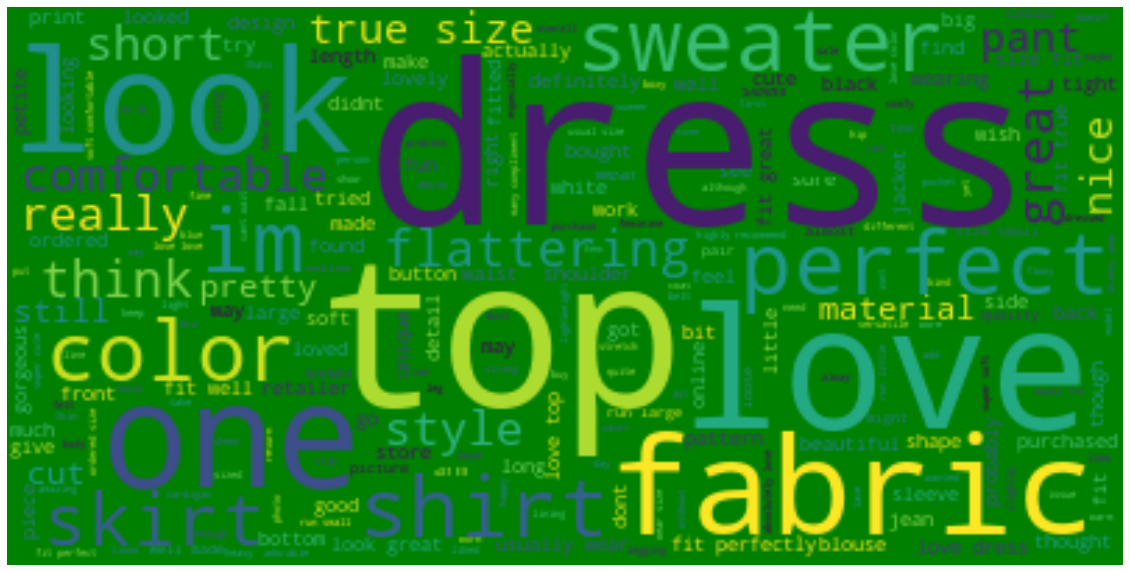

In [41]:
plt.figure(figsize = (20,20))
plt.imshow(worldcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.show()

NEGATIVE WORLDCLOUDS

In [42]:
worldcloud_negative.generate(negative_words)

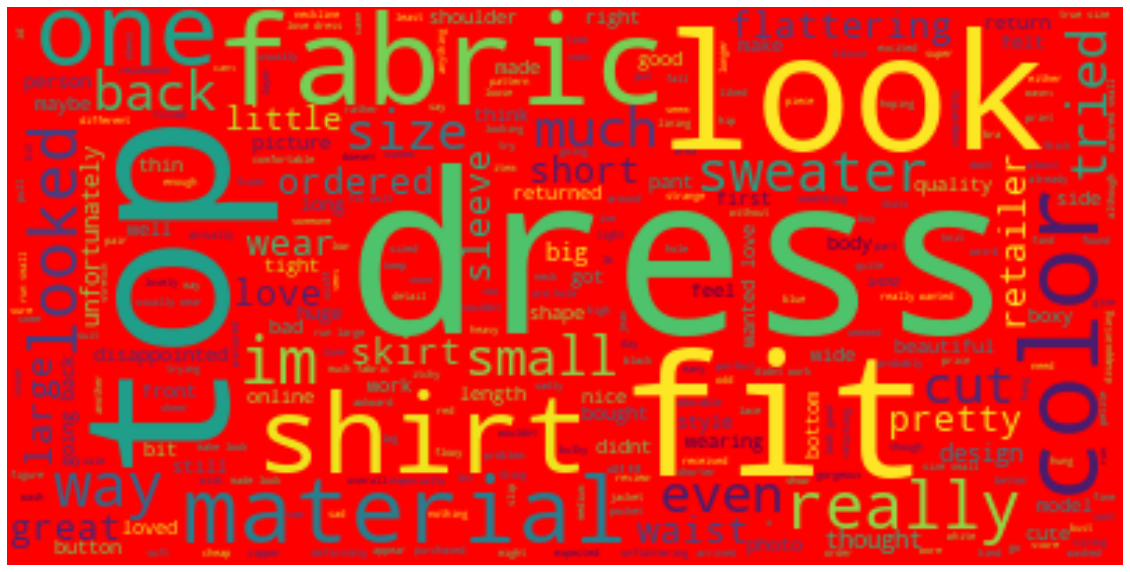

In [43]:
plt.figure(figsize = (20,20))
plt.imshow(worldcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [44]:
df.describe

<bound method NDFrame.describe of                                                     text  recommend
0      Absolutely wonderful - silky and sexy and comf...          1
1      Love this dress!  it's sooo pretty.  i happene...          1
2      I had such high hopes for this dress and reall...          0
3      I love, love, love this jumpsuit. it's fun, fl...          1
4      This shirt is very flattering to all due to th...          1
...                                                  ...        ...
23481  I was very happy to snag this dress at such a ...          1
23482  It reminds me of maternity clothes. soft, stre...          1
23483  This fit well, but the top was very see throug...          0
23484  I bought this dress for a wedding i have this ...          1
23485  This dress in a lovely platinum is feminine an...          1

[22641 rows x 2 columns]>

In [45]:
df.head()

,text,recommend
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [46]:
X = df["text"].values
y = df["recommend"].map({0:1, 1:0}).values

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=24)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [48]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [49]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### TF-IDF

In [50]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [51]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Eval Function

In [52]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    print("\n")
    print("--------------------------------------------------------------")
    print("Confusion Matrix")
    print(confusion_matrix(y_test, y_pred))

    print("--------------------------------------------------------------")
    print("Test_Set")
    print(classification_report(y_test,y_pred))

    print("--------------------------------------------------------------")
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

## Logistic Regression

### CountVectorizer

In [53]:
log = LogisticRegression(C =0.01, max_iter=1000, class_weight= "balanced", random_state=24)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=24)

In [54]:
print("LOGISTIC REGRESSION MODEL")
eval(log, X_train_count, X_test_count)

LOGISTIC REGRESSION MODEL


--------------------------------------------------------------
Confusion Matrix
[[2358  424]
 [ 100  515]]
--------------------------------------------------------------
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      2782
           1       0.55      0.84      0.66       615

    accuracy                           0.85      3397
   macro avg       0.75      0.84      0.78      3397
weighted avg       0.88      0.85      0.86      3397

--------------------------------------------------------------
Train_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     15758
           1       0.57      0.89      0.70      3486

    accuracy                           0.86     19244
   macro avg       0.77      0.87      0.80     19244
weighted avg       0.90      0.86      0.87     19244



In [55]:
scoring= ["accuracy", "f1", "recall", "precision"]

model = LogisticRegression(C =0.01, max_iter=1000, class_weight= "balanced", random_state=24)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 20, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 21))
df_scores.mean()[2:]

test_accuracy      0.847847
train_accuracy     0.860295
test_f1            0.669605
train_f1           0.696895
test_recall        0.849972
train_recall       0.886584
test_precision     0.552940
train_precision    0.574072
dtype: float64

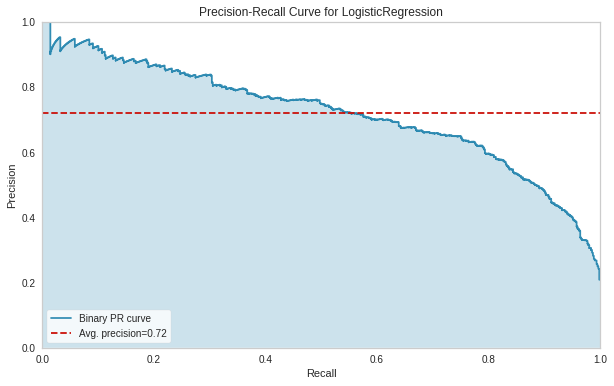

In [56]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
    LogisticRegression(C =0.01, max_iter=1000, class_weight= "balanced", random_state=24) 
    )
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [57]:
y_pred = log.predict(X_test_count)
log_AP_count = viz.score_
log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [58]:
log = LogisticRegression(C=0.05, max_iter=1000, random_state=24, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.05, class_weight='balanced', max_iter=1000,
                   random_state=24)

In [59]:
print("LOGISTIC REGRESSION MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOGISTIC REGRESSION MODEL


--------------------------------------------------------------
Confusion Matrix
[[2305  477]
 [  95  520]]
--------------------------------------------------------------
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      2782
           1       0.52      0.85      0.65       615

    accuracy                           0.83      3397
   macro avg       0.74      0.84      0.77      3397
weighted avg       0.88      0.83      0.85      3397

--------------------------------------------------------------
Train_Set
              precision    recall  f1-score   support

           0       0.97      0.84      0.90     15758
           1       0.55      0.89      0.68      3486

    accuracy                           0.85     19244
   macro avg       0.76      0.86      0.79     19244
weighted avg       0.89      0.85      0.86     19244



In [60]:
model = LogisticRegression(C=0.06, max_iter=1000, random_state=24, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 20, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 21))
df_scores.mean()[2:]

test_accuracy      0.840417
train_accuracy     0.849957
test_f1            0.662269
train_f1           0.682307
test_recall        0.862887
train_recall       0.889453
test_precision     0.537891
train_precision    0.553422
dtype: float64

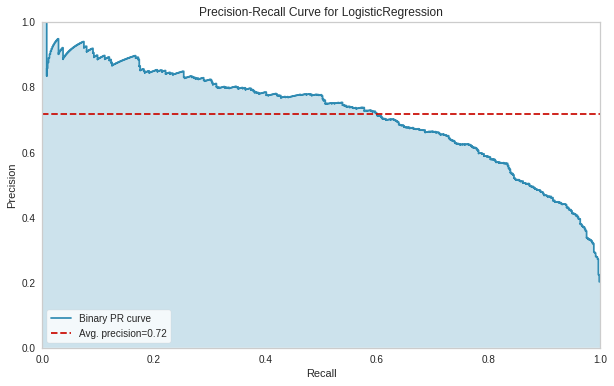

In [61]:
viz = PrecisionRecallCurve(
    LogisticRegression(C=0.05, max_iter=1000, random_state=24, class_weight="balanced")
    )
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [62]:
y_pred = log.predict(X_test_tf_idf)
log_AP_tfidf = viz.score_
log_tfidf_rec = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test,y_pred)

## Naive Bayes 

### Countvectorizer

In [63]:
nb = MultinomialNB(alpha=1.5)
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=1.5)

In [64]:
print("NAIVE BAYES MODEL")
eval(nb, X_train_count, X_test_count)

NAIVE BAYES MODEL


--------------------------------------------------------------
Confusion Matrix
[[2551  231]
 [ 163  452]]
--------------------------------------------------------------
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2782
           1       0.66      0.73      0.70       615

    accuracy                           0.88      3397
   macro avg       0.80      0.83      0.81      3397
weighted avg       0.89      0.88      0.89      3397

--------------------------------------------------------------
Train_Set
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     15758
           1       0.69      0.80      0.74      3486

    accuracy                           0.90     19244
   macro avg       0.82      0.86      0.84     19244
weighted avg       0.91      0.90      0.90     19244



In [65]:
model = MultinomialNB(alpha=1.5)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 20, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 21))
df_scores.mean()[2:]

test_accuracy      0.883390
train_accuracy     0.901238
test_f1            0.700101
train_f1           0.746776
test_recall        0.751547
train_recall       0.803922
test_precision     0.656017
train_precision    0.697217
dtype: float64

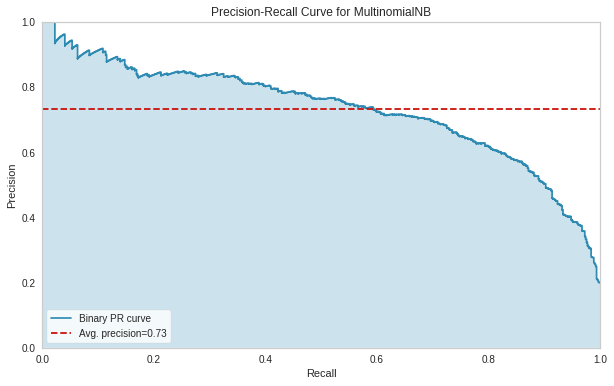

In [66]:
viz = PrecisionRecallCurve(
    MultinomialNB(alpha=1.5),
   
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [67]:
y_pred = nb.predict(X_test_count)
nb_AP_count = viz.score_
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [68]:
nb = BernoulliNB(alpha=0.7)
nb.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=0.7)

In [69]:
print("NAIVE BAYES MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NAIVE BAYES MODEL


--------------------------------------------------------------
Confusion Matrix
[[2522  260]
 [ 156  459]]
--------------------------------------------------------------
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      2782
           1       0.64      0.75      0.69       615

    accuracy                           0.88      3397
   macro avg       0.79      0.83      0.81      3397
weighted avg       0.89      0.88      0.88      3397

--------------------------------------------------------------
Train_Set
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     15758
           1       0.68      0.81      0.74      3486

    accuracy                           0.90     19244
   macro avg       0.82      0.86      0.84     19244
weighted avg       0.91      0.90      0.90     19244



In [70]:
model = BernoulliNB(alpha=0.7)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 20, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 21))
df_scores.mean()[2:]

test_accuracy      0.877570
train_accuracy     0.897975
test_f1            0.689118
train_f1           0.741268
test_recall        0.748954
train_recall       0.806806
test_precision     0.638733
train_precision    0.685579
dtype: float64

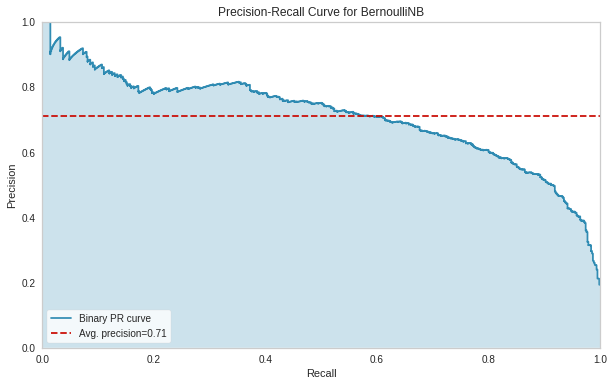

In [71]:
viz = PrecisionRecallCurve(
    BernoulliNB(alpha=0.7),
   
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [72]:
y_pred = nb.predict(X_test_tf_idf)
nb_AP_tfidf = viz.score_
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test,y_pred)

## Support Vector Machine (SVM)

### Countvectorizer

In [73]:
svc = LinearSVC(C=0.001, class_weight="balanced", random_state=24)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.001, class_weight='balanced', random_state=24)

In [74]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL


--------------------------------------------------------------
Confusion Matrix
[[2350  432]
 [  95  520]]
--------------------------------------------------------------
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      2782
           1       0.55      0.85      0.66       615

    accuracy                           0.84      3397
   macro avg       0.75      0.85      0.78      3397
weighted avg       0.89      0.84      0.86      3397

--------------------------------------------------------------
Train_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     15758
           1       0.57      0.89      0.70      3486

    accuracy                           0.86     19244
   macro avg       0.77      0.87      0.80     19244
weighted avg       0.90      0.86      0.87     19244



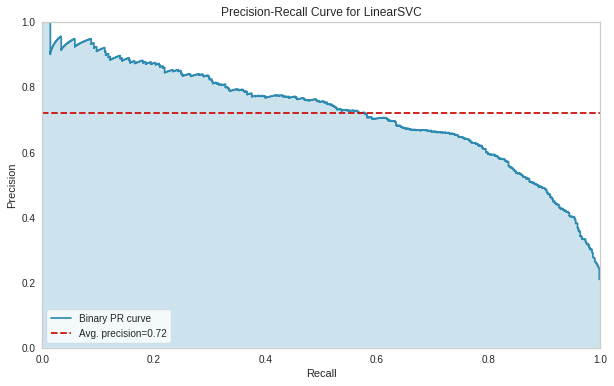

In [75]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.001, class_weight="balanced", random_state=24),
  
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [76]:
y_pred = svc.predict(X_test_count)
svc_AP_count = viz.score_
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test,y_pred)

### TD-IDF

In [77]:
svc = LinearSVC(C=0.03, class_weight="balanced", random_state=24)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.03, class_weight='balanced', random_state=24)

In [78]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL


--------------------------------------------------------------
Confusion Matrix
[[2372  410]
 [  89  526]]
--------------------------------------------------------------
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      2782
           1       0.56      0.86      0.68       615

    accuracy                           0.85      3397
   macro avg       0.76      0.85      0.79      3397
weighted avg       0.89      0.85      0.86      3397

--------------------------------------------------------------
Train_Set
              precision    recall  f1-score   support

           0       0.98      0.86      0.92     15758
           1       0.60      0.91      0.72      3486

    accuracy                           0.87     19244
   macro avg       0.79      0.89      0.82     19244
weighted avg       0.91      0.87      0.88     19244



In [79]:
model = LinearSVC(C=0.03, class_weight="balanced", random_state=24)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 20, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 21))
df_scores.mean()[2:]

test_accuracy      0.856577
train_accuracy     0.872912
test_f1            0.687689
train_f1           0.723024
test_recall        0.870338
train_recall       0.915693
test_precision     0.568930
train_precision    0.597341
dtype: float64

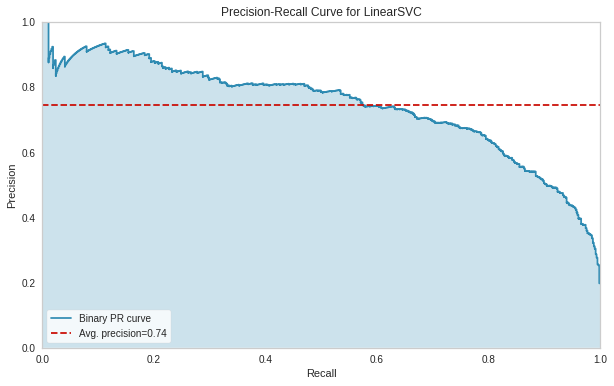

In [80]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.03, class_weight="balanced", random_state=24),

)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [81]:
y_pred = svc.predict(X_test_tf_idf)
svc_AP_tfidf = viz.score_
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test,y_pred)

## Random Forest

### Countvectorizer

In [82]:
rf = RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, n_jobs=-1,
                       random_state=42)

In [83]:
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, n_jobs=-1,
                       random_state=42)

In [84]:
print("RANDOM FOREST MODEL")
eval(rf, X_train_count, X_test_count)

RANDOM FOREST MODEL


--------------------------------------------------------------
Confusion Matrix
[[2302  480]
 [ 121  494]]
--------------------------------------------------------------
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.83      0.88      2782
           1       0.51      0.80      0.62       615

    accuracy                           0.82      3397
   macro avg       0.73      0.82      0.75      3397
weighted avg       0.87      0.82      0.84      3397

--------------------------------------------------------------
Train_Set
              precision    recall  f1-score   support

           0       0.97      0.84      0.90     15758
           1       0.56      0.88      0.68      3486

    accuracy                           0.85     19244
   macro avg       0.76      0.86      0.79     19244
weighted avg       0.89      0.85      0.86     19244



In [85]:
model = RandomForestClassifier(100, max_depth = 9, random_state = 24, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 20, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 21))
df_scores.mean()[2:]

test_accuracy      0.836465
train_accuracy     0.862352
test_f1            0.641623
train_f1           0.696999
test_recall        0.806924
train_recall       0.873811
test_precision     0.533046
train_precision    0.579800
dtype: float64

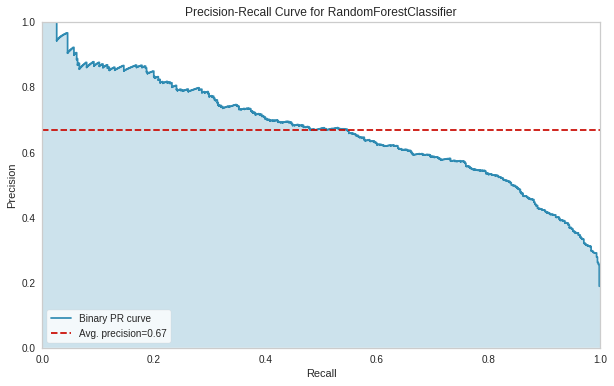

In [86]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 9, random_state = 24, n_jobs = -1, class_weight="balanced"),
  
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [87]:
y_pred = rf.predict(X_test_count)
rf_AP_count = viz.score_
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [88]:
rf = RandomForestClassifier(100, max_depth = 9, random_state = 24, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, n_jobs=-1,
                       random_state=24)

In [90]:
print("RANDOM FOREST MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RANDOM FOREST MODEL


--------------------------------------------------------------
Confusion Matrix
[[2308  474]
 [ 123  492]]
--------------------------------------------------------------
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      2782
           1       0.51      0.80      0.62       615

    accuracy                           0.82      3397
   macro avg       0.73      0.81      0.75      3397
weighted avg       0.87      0.82      0.84      3397

--------------------------------------------------------------
Train_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     15758
           1       0.57      0.90      0.70      3486

    accuracy                           0.86     19244
   macro avg       0.77      0.87      0.80     19244
weighted avg       0.90      0.86      0.87     19244



In [91]:
model = RandomForestClassifier(100, max_depth = 9, random_state = 24, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 20, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 21))
df_scores.mean()[2:]

test_accuracy      0.827371
train_accuracy     0.860178
test_f1            0.626186
train_f1           0.697620
test_recall        0.796617
train_recall       0.890131
test_precision     0.516384
train_precision    0.573684
dtype: float64

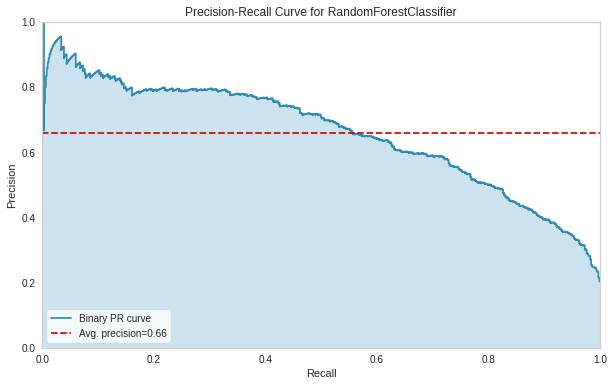

In [92]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced"),
   
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [93]:
y_pred = rf.predict(X_test_tf_idf)
rf_AP_tfidf = viz.score_
rf_tfidf_rec = recall_score(y_test, y_pred)
rf_tfidf_f1 = f1_score(y_test,y_pred)

## Ada Boosting

### Countvectorizer

In [94]:
ada = AdaBoostClassifier(n_estimators= 500, random_state = 24, learning_rate=0.8)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=500, random_state=24)

In [95]:
print("ADABOOST MODEL")
eval(ada, X_train_count, X_test_count)

ADABOOST MODEL


--------------------------------------------------------------
Confusion Matrix
[[2647  135]
 [ 272  343]]
--------------------------------------------------------------
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2782
           1       0.72      0.56      0.63       615

    accuracy                           0.88      3397
   macro avg       0.81      0.75      0.78      3397
weighted avg       0.87      0.88      0.87      3397

--------------------------------------------------------------
Train_Set
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     15758
           1       0.81      0.63      0.71      3486

    accuracy                           0.91     19244
   macro avg       0.87      0.80      0.83     19244
weighted avg       0.90      0.91      0.90     19244



In [96]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 24, learning_rate=0.8)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 20, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 21))
df_scores.mean()[2:]

test_accuracy      0.883859
train_accuracy     0.907476
test_f1            0.638225
train_f1           0.713151
test_recall        0.565970
train_recall       0.634946
test_precision     0.733154
train_precision    0.813358
dtype: float64

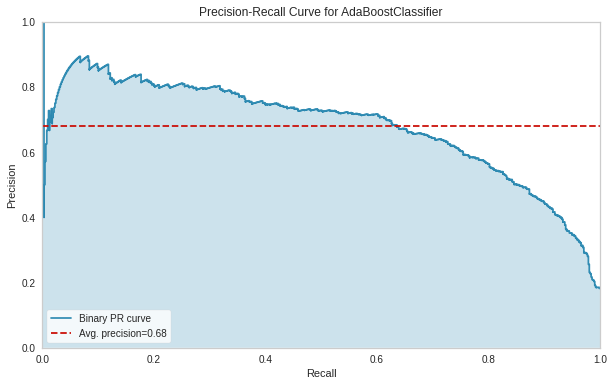

In [97]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 24, learning_rate=0.8),
    
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [98]:
y_pred = ada.predict(X_test_count)
ada_AP_count = viz.score_
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [99]:
ada = AdaBoostClassifier(n_estimators= 200, random_state = 24, learning_rate=0.8)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=200, random_state=24)

In [100]:
print("ADABOOST MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

ADABOOST MODEL


--------------------------------------------------------------
Confusion Matrix
[[2647  135]
 [ 279  336]]
--------------------------------------------------------------
Test_Set
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      2782
           1       0.71      0.55      0.62       615

    accuracy                           0.88      3397
   macro avg       0.81      0.75      0.77      3397
weighted avg       0.87      0.88      0.87      3397

--------------------------------------------------------------
Train_Set
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     15758
           1       0.78      0.59      0.67      3486

    accuracy                           0.90     19244
   macro avg       0.85      0.78      0.80     19244
weighted avg       0.89      0.90      0.89     19244



In [101]:
model = AdaBoostClassifier(n_estimators= 200, random_state = 24, learning_rate=0.8)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 20, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 21))
df_scores.mean()[2:]

test_accuracy      0.878714
train_accuracy     0.895475
test_f1            0.612821
train_f1           0.671883
test_recall        0.531263
train_recall       0.590784
test_precision     0.727125
train_precision    0.778813
dtype: float64

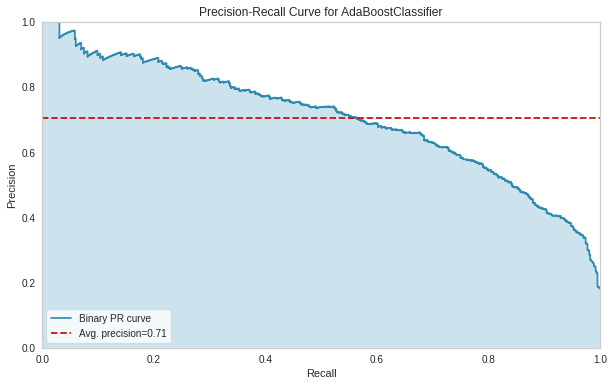

In [102]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 200, random_state = 24, learning_rate=0.8),

)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [103]:
y_pred = ada.predict(X_test_tf_idf)
ada_AP_tfidf = viz.score_
ada_tfidf_rec = recall_score(y_test, y_pred)
ada_tfidf_f1 = f1_score(y_test,y_pred)

## DL modeling

In [104]:
df.head(5)

,text,recommend
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [105]:
df.shape

(22641, 2)

### Tokenization

In [106]:
num_words = 15000 
tokenizer = Tokenizer(num_words=num_words)

In [107]:
tokenizer.fit_on_texts(X)

### Creating word index

In [108]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [109]:
len(tokenizer.word_index)

14847

In [110]:
num_words = 14847 
tokenizer = Tokenizer(num_words=num_words)

In [111]:
tokenizer.fit_on_texts(X)

### Converting tokens to numeric

In [112]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [113]:
X[24]

"I love this shirt because when i first saw it, i wasn't sure if it was a shirt or dress. since it is see-through if you wear it like a dress you will need a slip or wear it with leggings. i bought a slip, wore the tie in the back, and rocked it with white wedges. you could also wear it as a vest. be careful with the buttons. i haven't had any fall off yet, but i feel like they will. overall it's great for any occasion and it's fun to wear!"

In [114]:
print(X_num_tokens[24])

[2, 21, 7, 80, 64, 74, 2, 171, 196, 5, 2, 282, 224, 49, 5, 15, 4, 80, 37, 18, 235, 5, 6, 121, 203, 49, 40, 32, 5, 28, 4, 18, 40, 55, 212, 4, 376, 37, 32, 5, 14, 268, 2, 72, 4, 376, 227, 1, 467, 9, 1, 63, 3, 6694, 5, 14, 140, 1059, 40, 118, 87, 32, 5, 30, 4, 492, 29, 1060, 14, 1, 333, 2, 758, 65, 251, 172, 146, 326, 10, 2, 145, 28, 42, 55, 250, 33, 34, 12, 251, 1206, 3, 33, 283, 8, 32]


### Maximum number of tokens for all documents¶

In [115]:
len(X_num_tokens[24])

95

In [116]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [117]:
num_tokens.mean()

60.6069519897531

In [118]:
num_tokens.max()

116

In [119]:
num_tokens.argmax()

16263

In [120]:
X[16263]

"I love maeve tops. i love the material and feel of this brand. when i saw the new tops that came out i ran to my local store to try one on. i'm usually a large in a top, once in a while an xl. they only had a large to try so i tried it in the black motif.\ni could barely get the top on. it looked like i was missing 1/2 of the top. i doubled checked the size and it was a large.\nit's a shame, the top is really cute. if you are the least bit broad or busty, go up a size or two. if you are usually a"

In [121]:
max_tokens = 116

In [122]:
sum(num_tokens <= max_tokens) / len(num_tokens)

1.0

In [123]:
# %100 percent will be used

### Fixing token counts of all documents (pad_sequences)

In [124]:
X_pad = pad_sequences(X_num_tokens, maxlen = max_tokens)

In [125]:
X_pad.shape

(22641, 116)

In [126]:
np.array(X_num_tokens[24])

array([   2,   21,    7,   80,   64,   74,    2,  171,  196,    5,    2,
        282,  224,   49,    5,   15,    4,   80,   37,   18,  235,    5,
          6,  121,  203,   49,   40,   32,    5,   28,    4,   18,   40,
         55,  212,    4,  376,   37,   32,    5,   14,  268,    2,   72,
          4,  376,  227,    1,  467,    9,    1,   63,    3, 6694,    5,
         14,  140, 1059,   40,  118,   87,   32,    5,   30,    4,  492,
         29, 1060,   14,    1,  333,    2,  758,   65,  251,  172,  146,
        326,   10,    2,  145,   28,   42,   55,  250,   33,   34,   12,
        251, 1206,    3,   33,  283,    8,   32])

In [127]:
np.array(X_num_tokens[48])

array([   7,   88,    6,   54,   12,  172,   33,  542,  295,  128,  242,
          3,    1,   47,   51, 2126])

In [128]:
np.array(X_num_tokens[16263])

array([   2,   21,  771,  218,    2,   21,    1,   83,    3,  145,   13,
          7,  480,   74,    2,  196,    1,  447,  218,   20,  364,   62,
          2,  516,    8,   17,  494,  106,    8,  179,   56,   11,   36,
        107,    4,   79,    9,    4,   25,  425,    9,    4,  247,   60,
        418,   42,  117,   65,    4,   79,    8,  179,   16,    2,  104,
          5,    9,    1,  123,  791,    2,  118,  778,  115,    1,   25,
         11,    5,  157,   28,    2,   15, 1609,  504,  160,   13,    1,
         25,    2, 4114, 1777,    1,   22,    3,    5,   15,    4,   79,
         33,    4, 1376,    1,   25,    6,   51,   69,   49,   40,   27,
          1,  502,   77,  652,   37,  583,  147,   43,    4,   22,   37,
        262,   49,   40,   27,  107,    4])

In [129]:
X_pad[16263] #same after padding

array([   2,   21,  771,  218,    2,   21,    1,   83,    3,  145,   13,
          7,  480,   74,    2,  196,    1,  447,  218,   20,  364,   62,
          2,  516,    8,   17,  494,  106,    8,  179,   56,   11,   36,
        107,    4,   79,    9,    4,   25,  425,    9,    4,  247,   60,
        418,   42,  117,   65,    4,   79,    8,  179,   16,    2,  104,
          5,    9,    1,  123,  791,    2,  118,  778,  115,    1,   25,
         11,    5,  157,   28,    2,   15, 1609,  504,  160,   13,    1,
         25,    2, 4114, 1777,    1,   22,    3,    5,   15,    4,   79,
         33,    4, 1376,    1,   25,    6,   51,   69,   49,   40,   27,
          1,  502,   77,  652,   37,  583,  147,   43,    4,   22,   37,
        262,   49,   40,   27,  107,    4], dtype=int32)

### Train Set Split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.1, stratify=y, random_state=24)

### Modeling

In [131]:
model = Sequential()

In [132]:
embedding_size = 50

In [133]:
model.add(Embedding(input_dim=num_words,       
                    output_dim=embedding_size, 
                    input_length=max_tokens))
model.add(Dropout(0.2))

model.add(GRU(units=48, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=24, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=12))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [134]:
optimizer = Adam(lr=0.001)

In [135]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])

In [136]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 116, 50)           742350    
                                                                 
 dropout (Dropout)           (None, 116, 50)           0         
                                                                 
 gru (GRU)                   (None, 116, 48)           14400     
                                                                 
 dropout_1 (Dropout)         (None, 116, 48)           0         
                                                                 
 gru_1 (GRU)                 (None, 116, 24)           5328      
                                                                 
 dropout_2 (Dropout)         (None, 116, 24)           0         
                                                                 
 gru_2 (GRU)                 (None, 12)                1

In [137]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max", 
                           verbose=1, patience = 1, restore_best_weights=True)

In [138]:
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([0.61060833, 2.76022758])

In [139]:
model.fit(X_train, y_train, epochs=25, batch_size=128, sample_weight=classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/25
160/160 [==============================] - 36s 182ms/step - loss: 0.4992 - recall: 0.8282 - val_loss: 0.4657 - val_recall: 0.9293
Epoch 2/25
160/160 [==============================] - 27s 171ms/step - loss: 0.3053 - recall: 0.9046 - val_loss: 0.3959 - val_recall: 0.9146
Epoch 2: early stopping


In [140]:
model_loss = pd.DataFrame(model.history.history)
model_loss[["recall","val_recall"]]

,recall,val_recall
0,0.828231,0.929268
1,0.904633,0.914634


In [141]:
y_pred = model.predict(X_test) >= 0.5
print("\n")
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

71/71 [==============================] - 3s 25ms/step


Confusion Matrix
[[1426  429]
 [  29  381]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.77      0.86      1855
           1       0.47      0.93      0.62       410

    accuracy                           0.80      2265
   macro avg       0.73      0.85      0.74      2265
weighted avg       0.89      0.80      0.82      2265



In [142]:
y_train_pred = model.predict(X_train) >= 0.5

print("\n")
print("Confusion Matrix")
print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

637/637 [==============================] - 13s 20ms/step


Confusion Matrix
[[13141  3544]
 [  128  3563]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.79      0.88     16685
           1       0.50      0.97      0.66      3691

    accuracy                           0.82     20376
   macro avg       0.75      0.88      0.77     20376
weighted avg       0.90      0.82      0.84     20376



In [143]:
y_pred_proba = model.predict(X_test)
average_precision_score(y_test, y_pred_proba)

71/71 [==============================] - 1s 20ms/step


0.7149761694992021

In [144]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

## BERT Modeling

### Tokenization

In [145]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

max_token = []
for sent in X:
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    max_token.append(len(input_ids))
  
print('Max sentence length is', max(max_token), "tokens.")

Max sentence length is 162 tokens.


In [146]:
np.array(max_token).mean()

76.75659202332052

In [147]:
sum(np.array(max_token) <= 162) / len(max_token)

1.0

### Train test split

In [148]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.1, stratify=y, random_state=24)

### Transformation text to tensor

In [149]:
def transformation(X):
  seq_len = 162
  num_samples = len(X)

  Xids = np.zeros((num_samples, seq_len))
  Xmask = np.zeros((num_samples, seq_len))

    
  for i, phrase in enumerate(X):
      tokens = tokenizer.encode_plus(phrase, max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True) 
      
      Xids[i] = tokens['input_ids']
      Xmask[i] = tokens['attention_mask']
  return Xids, Xmask


In [150]:
Xids_train, Xmask_train = transformation(X_train2)
Xids_test, Xmask_test = transformation(X_test2)

In [151]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (20376, 162)
Xmask_train.shape : (20376, 162)
Xids_test.shape   : (2265, 162)
Xmask_test.shape  : (2265, 162)


In [152]:
labels_train = y_train2.reshape(-1,1)
labels_train

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [153]:
labels_test = y_test2.reshape(-1,1)
labels_test

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [154]:
import tensorflow as tf
dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, labels_train))
dataset_train

<TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [155]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, labels_test))
dataset_test

<TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [156]:
def map_func(Xids, Xmask, labels):
    return {'input_ids': Xids, 'attention_mask': Xmask}, labels

In [157]:
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [158]:
dataset_train

<MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.float64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [159]:
dataset_test

<MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.float64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

### Batch Size

In [160]:
len(X_train2)

20376

In [161]:
batch_size = 32

In [162]:
train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)

length = len(X_train2)
train_ds2 = dataset_train.shuffle(buffer_size = length, reshuffle_each_iteration=True).batch(batch_size)

### Creating Model

In [163]:
def create_model():
    from transformers import TFAutoModel
    from tensorflow.keras.layers import Input, Dropout, Dense
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"]

    x = Dense(80, activation='relu')(embeddings)
    x = Dropout(0.1, name="dropout")(x)
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)

In [164]:
with strategy.scope():

  from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.losses import BinaryCrossentropy
  from tensorflow.keras.metrics import Recall
  
  optimizer = Adam(learning_rate=2e-5)
  loss = BinaryCrossentropy()
  recall = Recall()
  model = create_model()
  model.compile(optimizer=optimizer, loss=loss, metrics=[recall])

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [165]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 162)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 162)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 162,                                           

In [166]:
history = model.fit(
    train_ds2, validation_data= val_ds,
    epochs=1)
# Model can overfit easily, so epoch is defined as 1

637/637 [==============================] - 206s 190ms/step - loss: 0.2301 - recall: 0.6784 - val_loss: 0.1893 - val_recall: 0.8634


### Model evaluation

In [167]:
y_pred = model.predict(val_ds) >= 0.5

print(classification_report(y_test2, y_pred))

71/71 [==============================] - 12s 103ms/step
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1855
           1       0.72      0.86      0.78       410

    accuracy                           0.91      2265
   macro avg       0.84      0.89      0.87      2265
weighted avg       0.92      0.91      0.92      2265



In [168]:
y_train_pred = model.predict(train_ds) >= 0.5

print(classification_report(y_train2, y_train_pred)) 

637/637 [==============================] - 24s 37ms/step
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     16685
           1       0.79      0.93      0.85      3691

    accuracy                           0.94     20376
   macro avg       0.89      0.94      0.91     20376
weighted avg       0.95      0.94      0.94     20376



71/71 [==============================] - 3s 30ms/step


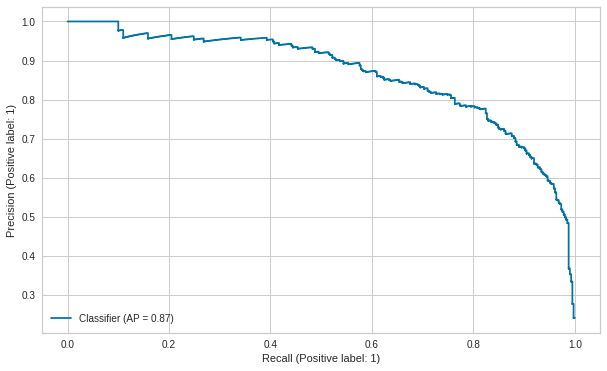

In [169]:
y_pred_proba = model.predict(val_ds)

PrecisionRecallDisplay.from_predictions(y_test2, y_pred_proba)
plt.show();

In [170]:
average_precision_score(y_test2, y_pred_proba)

0.8654193631339686

In [171]:
BERT_AP = average_precision_score(y_test2, y_pred_proba)
BERT_f1 = f1_score(y_test2, y_pred)
BERT_rec = recall_score(y_test2, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

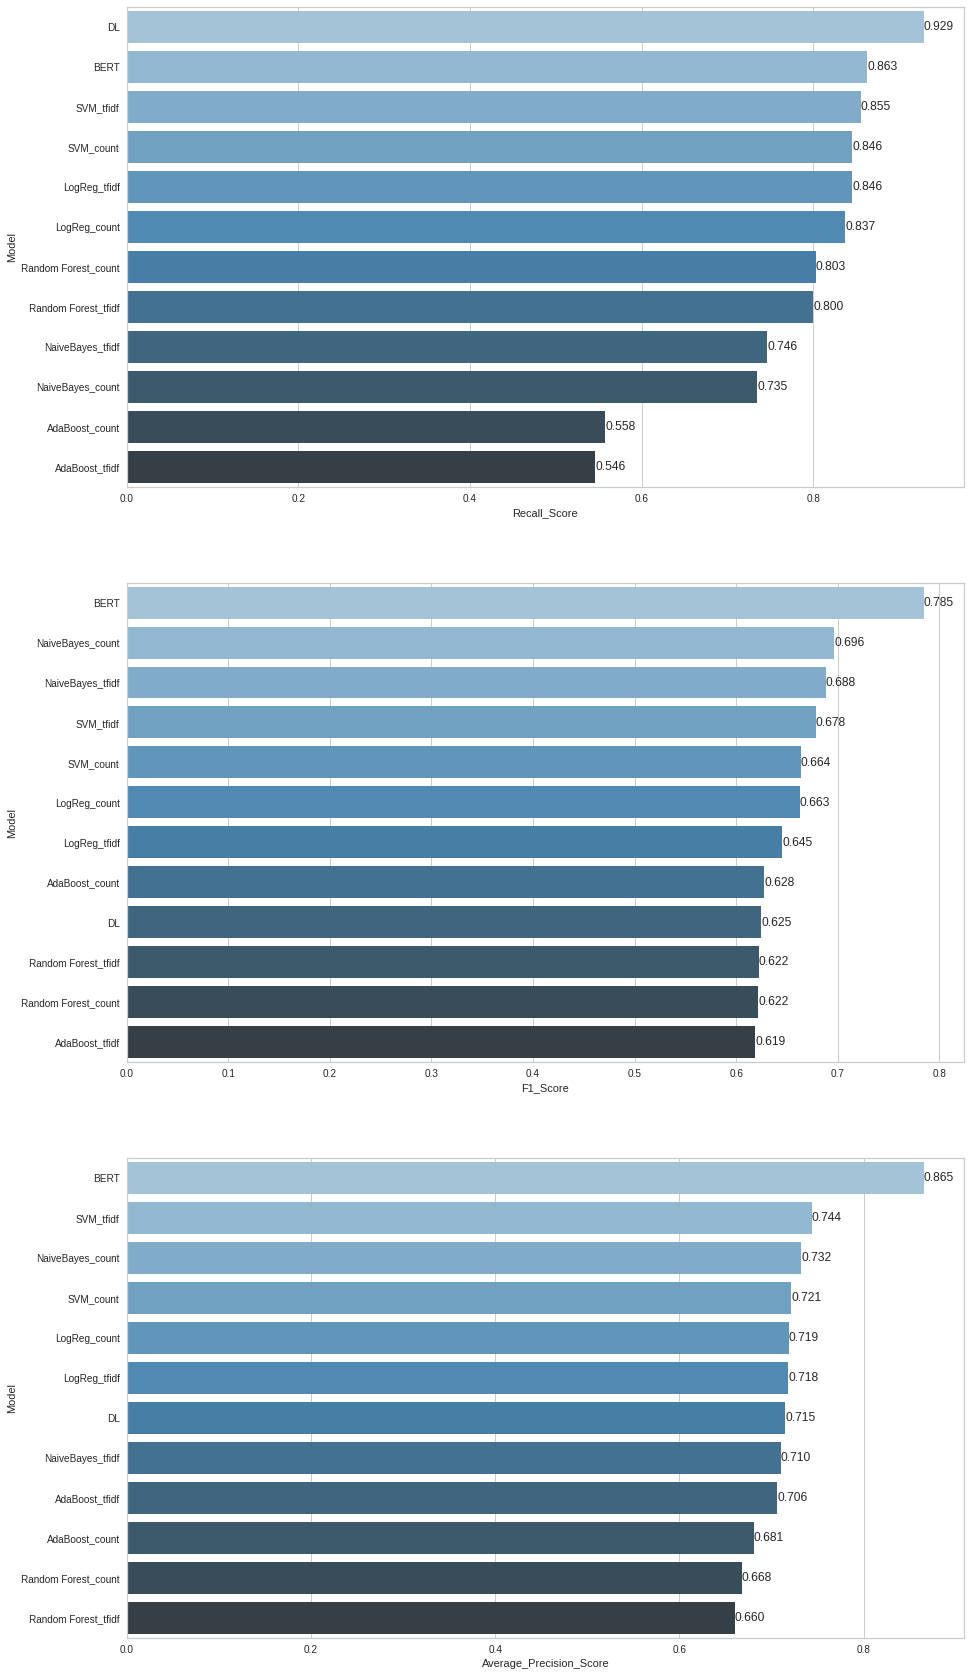

In [172]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count", 
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf", 
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL", "BERT"],
                        
                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1,
                                             rf_count_f1, ada_count_f1, nb_tfidf_f1, log_tfidf_f1,
                                             svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1, BERT_f1],
                        
                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, 
                                                   rf_count_rec, ada_count_rec, 
                                                  nb_tfidf_rec, log_tfidf_rec, svc_tfidf_rec, 
                                                  rf_tfidf_rec, ada_tfidf_rec, DL_rec, BERT_rec],
                        
                        "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count,
                                                   ada_AP_count, nb_AP_tfidf, log_AP_tfidf, svc_AP_tfidf,
                                                   rf_AP_tfidf, ada_AP_tfidf, DL_AP, BERT_AP]})


plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax=sns.barplot(x="Average_Precision_Score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();


### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___